### Clustering of BBC News Articles

Certification ProjectYou are given a zip file which contains summaries of news from BBC. The Data is taken from Kaggle. (https://www.kaggle.com/pariza/bbc-news-summary) 

The zip file contains a folder: ‘BBCNews Articles‘ 
    
This folder contains 5 sub folders, named: 
    1.Business 
    2.Entertainment 
    3.Politics 
    4.Sports
    5.Tech

Each of these subfolders contains text files which have summaries of different news articles

These are the tasks which you have to perform:

    •Read all the files from all subfolders and store their summaries in a single CSV file. Name CSV File as: “BBCNewsArticles.csv”
    
The CSV should contain: 
    
   ![Capture.PNG](attachment:Capture.PNG)
    
    •Randomly arrange the data
    
    •Preprocess each article using Text Preprocessing
    
    •On the preprocessed text, perform Vectorization using 3 types of vectors.
        1.“PresenceAbsenceVector”: Converts Articleto vectors using Presence and Absence of Words
        2.“CountVector”: Converts Articleto vectors using Count of Words
        3.“TF-IDFVector”: Converts Articleto vectors using TF-IDF vectorization
        
    •Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5. You can choose any appropriate clustering algorithmof your choice.Make models for each type of vectorization. We will have a total of 3 models.
    
    •Savethe Clusters Label for each model in a new CSV file named “BBCNewsArticlesClustered.csv”
    
    •Evaluate and compare the performance of 3 models on basis of Silhouette Coefficient.
    
    •Provide Visualizations for all 3 models. You can show scatter plots and bar graphs.
    
    •Provide your explanation for the following questions 
        1.What does Silhouette Coefficienttell us?
        2.Which algorithm you chose and why?
        3.Can you provide an appropriate name to a cluster label? If yes, then explain your observations.
        4.Which vectorization techniqueis the best and why?

    

In [ ]:
•Read all the files from all subfolders and store their summaries in a single CSV file. Name CSV File as: “BBCNewsArticles.csv”

In [1]:
import nltk.corpus
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#df2 =pd.DataFrame([[category,file.read()]],columns=['category','text'])
#df = df.append(df2,ignore_index=True,)
#df = df.append(pd.DataFrame([[category,file.read()]],columns=['category','text']),ignore_index=True)
        
df = pd.DataFrame(columns=['category','article'])
#df2 = pd.DataFrame(columns=['category','text'])

for category in os.listdir(path="BBC News Articles/"):
    for news in os.listdir(path="BBC News Articles/"+category+"/"):
        
        file = open("BBC News Articles/"+category+"/"+news,'r+')
        df = df.append({"category":category,"article":file.read()},ignore_index=True)
        

In [3]:
df['article'].to_csv("BBCNewsArticles.csv")

In [ ]:
#•Preprocess each article using Text Preprocessing

In [4]:
import PreProcess
df['article'] = df['article'].apply(lambda x: " ".join(PreProcess.refine(x)))
df['article']

0      Ad sale boost Time Warner profit Quarterly pro...
1      Dollar gain Greenspan speech The dollar hit hi...
2      Yukos unit buyer face loan claim The owner emb...
3      High fuel price hit BA 's profit British Airwa...
4      Pernod takeover talk lift Domecq Shares UK dri...
                             ...                        
174    US woman sue cartridge A US woman suing Hewlet...
175    Movie body hit peer-to-peer net The movie indu...
176    Security warning 'FBI virus' The US Federal Bu...
177    Apple iPod family expands market Apple expande...
178    T-Mobile bet 'pocket office' T-Mobile launched...
Name: article, Length: 179, dtype: object

In [ ]:
#•On the preprocessed text, perform Vectorization using 3 types of vectors.
#    1.“PresenceAbsenceVector”: Converts Articleto vectors using Presence and Absence of Words
#    2.“CountVector”: Converts Articleto vectors using Count of Words
#    3.“TF-IDFVector”: Converts Articleto vectors using TF-IDF vectorization

In [6]:
import Corpus
import Vectorization
import imp

In [7]:
# 1.“PresenceAbsenceVector”: Converts Articleto vectors using Presence and Absence of Words

absencevector = Vectorization.PresenceAbsenceVectorization(df['article'])
absencedf = pd.DataFrame(absencevector[1],columns=absencevector[0])


In [8]:
# 2.“CountVector”: Converts Articleto vectors using Count of Words

cntvector = Vectorization.CountVectorization(df['article'])
countvectordf = pd.DataFrame(cntvector[1],columns=cntvector[0])

In [9]:
#3.“TF-IDFVector”: Converts Articleto vectors using TF-IDF vectorization

tfidfvector = Vectorization.TFIDFVectorization(df['article'])
tfidfdf = pd.DataFrame(tfidfvector[1],columns=tfidfvector[0])

In [ ]:
•Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5. You can choose any appropriate clustering algorithm of your choice. Make models for each type of vectorization. We will have a total of 3 models.

In [10]:
X_absence = absencedf
X_countvector = countvectordf
X_tfidf = tfidfdf

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y =le.fit_transform(df['category'])

In [ ]:
# clustering data using KMeans clustering

In [12]:
from sklearn.cluster import KMeans
absencemodel = KMeans(n_clusters=5)
absence_clusters = absencemodel.fit_predict(X_absence)

In [13]:
absence_clusters

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 3, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4,
       4, 4, 4, 0, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 4,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [15]:
countvectormodel = KMeans(n_clusters=5,)
countvector_clusters = countvectormodel.fit_predict(X_countvector)

In [16]:
countvector_clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 1, 3, 4, 3, 1, 1, 1, 1, 3,
       3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 2, 2, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3,
       4, 3, 2])

In [17]:
tfidfmodel = KMeans(n_clusters=5)
tfidfmodel_clusters = tfidfmodel.fit_predict(X_tfidf)

In [18]:
tfidfmodel_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 1, 2,
       2, 1, 2])

In [26]:
tfidfmodel.

(179,)

In [ ]:
#•Savethe Clusters Label for each model in a new CSV file named “BBCNewsArticlesClustered.csv”

In [19]:
df_vectors = pd.DataFrame([absence_clusters,countvector_clusters,tfidfmodel_clusters]).T
df_vectors.columns=['absence_clusters','countvector_clusters','tfidfmodel_clusters']

In [20]:
df_vectors

,absence_clusters,countvector_clusters,tfidfmodel_clusters
0,0,3,1
1,1,3,1
2,0,3,1
3,1,3,1
4,0,3,1
...,...,...,...
174,0,3,1
175,0,3,2
176,0,4,2
177,0,3,1


In [21]:
df_vectors.to_csv('BBCNewsArticlesClustered.csv')

In [ ]:
•Evaluate and compare the performance of 3 models on basis of Silhouette Coefficient.



In [45]:
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline

print(f'PresenceAbsence Silhouette Score(n=2): {silhouette_score(pa_vecs, absence_clusters)}')

PresenceAbsence Silhouette Score(n=2): 0.02763044837234215


In [46]:
print(f'CounterVector Silhouette Score(n=2): {silhouette_score(cnt_vecs, countvector_clusters)}')

CounterVector Silhouette Score(n=2): 0.36029417611364845


In [47]:
print(f'CounterVector Silhouette Score(n=2): {silhouette_score(tfidf_vecs, tfidfmodel_clusters)}')

CounterVector Silhouette Score(n=2): 0.18930064119024168


In [ ]:
•Provide Visualizations for all 3 models. You can show scatter plots and bar graphs.

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pa_vecs = pca.fit_transform(absencevector[1])
# save our two dimensions into x0 and x1
pa_x0 = pa_vecs[:, 0]
pa_x1 = pa_vecs[:, 1]




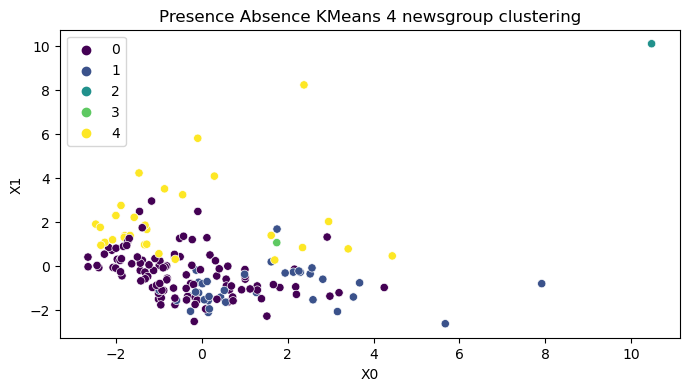

In [41]:
# set image size
plt.figure(figsize=(8,4))
# set a title
plt.title("Presence Absence KMeans 5 newsgroup clustering")
plt.xlabel("X0")
plt.ylabel("X1")
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(x=pa_x0, y=pa_x1, hue=absence_clusters, palette="viridis")
plt.show()



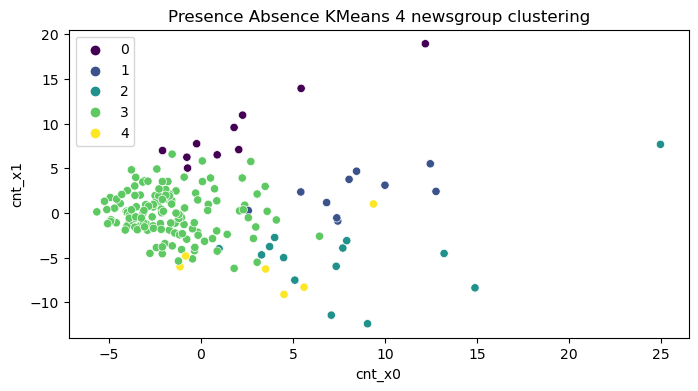

In [42]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
cnt_vecs = pca.fit_transform(cntvector[1])
# save our two dimensions into x0 and x1
cnt_x0 = cnt_vecs[:, 0]
cnt_x1 = cnt_vecs[:, 1]


# set image size
plt.figure(figsize=(8,4))
# set a title
plt.title("Counter vector KMeans 5 newsgroup clustering")
plt.xlabel("cnt_x0")
plt.ylabel("cnt_x1")
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(x=cnt_x0, y=cnt_x1, hue=countvector_clusters, palette="viridis")
plt.show()

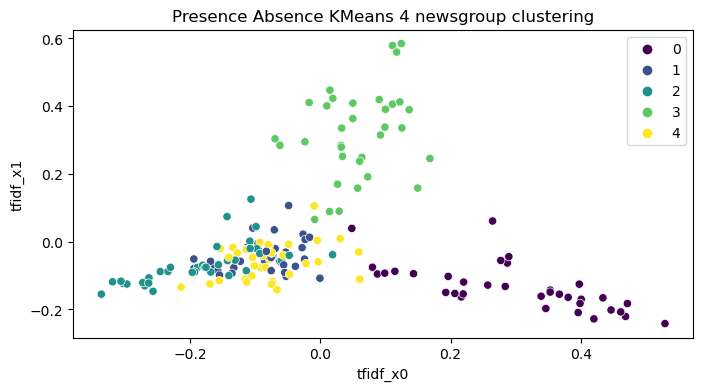

In [44]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
tfidf_vecs = pca.fit_transform(tfidfvector[1])
# save our two dimensions into x0 and x1
tfidf_x0 = tfidf_vecs[:, 0]
tfidf_x1 = tfidf_vecs[:, 1]

# set image size
plt.figure(figsize=(8,4))
# set a title
plt.title("TFIDF vector KMeans 4 newsgroup clustering")
plt.xlabel("tfidf_x0")
plt.ylabel("tfidf_x1")
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(x=tfidf_x0, y=tfidf_x1, hue=tfidfmodel_clusters, palette="viridis")
plt.show()

In [ ]:
•Provide your explanation for the following questions 
    1.What does Silhouette Coefficienttell us?
    2.Which algorithm you chose and why?
    3.Can you provide an appropriate name to a cluster label? If yes, then explain your observations.
    4.Which vectorization techniqueis the best and why?

In [ ]:
1. What does Silhouette Coefficienttell us?

Silhouette coefficient tell us how similar a data point is within cluster


In [ ]:
2. Which algorithm you chose and why?

I chose kmeans algorithm and it is easy and best to find the categories of unlabeled dataset.

In [ ]:
3. Can you provide an appropriate name to a cluster label? If yes, then explain your observations.

No. We have taken unlabled group of text to analyse. So it is hard to explaying by seeing the cluster

In [ ]:
4.Which vectorization techniqueis the best and why?

TFIDf is best because it gives numbers based on weighs. Which could be identified as separate words.